In [2]:
%matplotlib inline
from pjr import *

In [3]:
fname = "/Users/d3x345/Desktop/NetCDF_files/vd05_ANN_climo.nc"
g2 = cdms2.open(fname);
varlist = g2.listvariables();
dims = g2.listdimension();
#print dims;
#print varlist;

conv = 86400.*1000. # convert m/s to mm/d
PRECC =  g2('PRECC',squeeze=1)*conv            # extract fields, remove dimensions length one
PRECL =  g2('PRECL',squeeze=1)*conv            # extract fields, remove dimensions length one
PRECSC =  g2('PRECSC',squeeze=1)*conv          # extract fields, remove dimensions length one
PRECSL =  g2('PRECSL',squeeze=1)*conv          # extract fields, remove dimensions length one
PRECT = PRECC + PRECL
PRECST = PRECSC + PRECSL
LANDFRAC2 = g2('LANDFRAC',squeeze=1)
print "V2 range", PRECT.min(), PRECT.max()
lat2 = g2['lat']
lon2 = g2['lon']
print "PRECC.info()", PRECC.info()


# if V2av and V2a_av differ it suggests that the averager is using a different weighting value
print "PRECCav=", cdutil.averager(PRECC,axis="xy",weights="weighted")
print "PRECLav=", cdutil.averager(PRECL,axis="xy",weights="weighted")
print "PRECTav=", cdutil.averager(PRECT,axis="xy",weights="weighted")
print "PRECSCav=", cdutil.averager(PRECSC,axis="xy",weights="weighted")
print "PRECSLav=", cdutil.averager(PRECSL,axis="xy",weights="weighted")
print "PRECSTav=", cdutil.averager(PRECST,axis="xy",weights="weighted")

print "LANDFRAC2av=", cdutil.averager(LANDFRAC2,axis="xy",weights="weighted")


V2 range 0.00925301 26.0616
PRECC.info()*** Description of Slab variable_1 ***
id: variable_1
shape: (192, 288)
filename: 
missing_value: 1e+20
comments: 
grid_name: <None>
grid_type: generic
time_statistic: 
long_name: Convective precipitation rate (liq + ice)
units: m/s
tileIndex: None
cell_methods: time: mean
Grid has Python id 0x11c4e9c10.
Gridtype: generic
Grid shape: (192, 288)
Order: yx
** Dimension 1 **
   id: lat
   Designated a latitude axis.
   units:  degrees_north
   Length: 192
   First:  -89.7643979058
   Last:   89.7643979058
   Other axis attributes:
      realtopology: linear
      long_name: latitude
      standard_name: latitude
      axis: Y
   Python id:  0x11c4e9a10
** Dimension 2 **
   id: lon
   Designated a longitude axis.
   units:  degrees_east
   Length: 288
   First:  0.0
   Last:   358.75
   Other axis attributes:
      modulo: 360.0
      realtopology: circular
      long_name: longitude
      standard_name: longitude
      axis: X
      topology: circul

axes [   id: lat
   Designated a latitude axis.
   units:  degrees_north
   Length: 96
   First:  0.471204188482
   Last:   89.7643979058
   Other axis attributes:
      realtopology: linear
      long_name: latitude
      standard_name: latitude
      axis: Y
   Python id:  0x18197c7850
,    id: lon
   Designated a longitude axis.
   units:  degrees_east
   Length: 113
   First:  220.0
   Last:   360.0
   Other axis attributes:
      modulo: 360.0
      realtopology: circular
      long_name: longitude
      standard_name: longitude
      axis: X
      topology: circular
   Python id:  0x181af23d50
]
LF2a_av= 2.12864521353


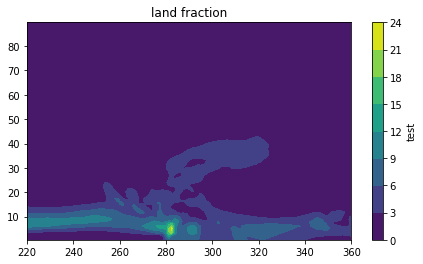

In [28]:
V2N = g2('PRECC',squeeze=1,lat=(0.,90.),lon=(220.,360.))*conv            # extract fields, remove dimensions length one
V2NA = cdutil.averager(V2N,axis="xy",weights="weighted")
#print "V2NA.info()", V2N.info(), V2N.shape;
#print "V2NA", V2NA
print "axes", V2N.getAxisList()
V2NS = V2N[:]  # produce a non-transient variable
#print "V2NS info", V2NS.info()
lat = V2NS.getAxis(0)
#print "lat", lat
lon = V2NS.getAxis(1)
#print "lon", lon
#help(V2NA)
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
plt.title("land fraction")
cs = plt.contourf(lon, lat, V2NS)
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('test')
print "LF2a_av=", cdutil.averager(V2NS,axis="xy",weights="weighted")
plt.show()

LF2a_av= 0.291745926917


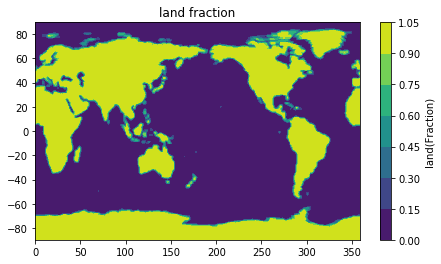

In [4]:
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
plt.title("land fraction")
cs = plt.contourf(lon2, lat2, LANDFRAC2)
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('land(Fraction)')
print "LF2a_av=", cdutil.averager(LANDFRAC2,axis="xy",weights="weighted")
plt.show()

llist False True
longname Fraction of sfc area covered by land
DVM = 0.96
[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]


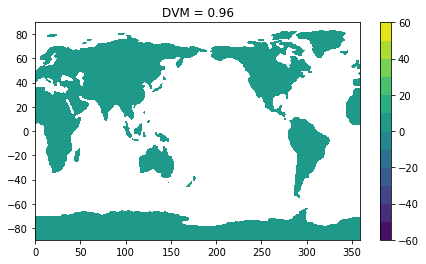

In [5]:
#LANDFRAC.info()
#print "LANDFRAC2 =", cdutil.averager(LANDFRAC2,axis="xy",weights="weighted")
#print "masked LANDFRAC2 =", cdutil.averager(LFM,axis="xy",weights="weighted")
#print "dir(LF)", dir(LANDFRAC)
#print "xx", LANDFRAC2.info()
llist = (LANDFRAC2[:] < 0.5)
print "llist",llist[0,0],llist[-1,-1] # print out a few values which should be near NP and SP
#print "land zero", llist.shape
DVM = LANDFRAC2
DVM.mask = llist # add a mask for land points
print "longname",DVM.long_name
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
gavg = cdutil.averager(DVM,axis="xy",weights="weighted")
#titl = "{0:s} (model-obs) = {1:f}".format("DVM",gavg)
titl = "%s = %.2f"%("DVM", gavg)
print titl
plt.title(titl)
clevs =  np.arange(-60.,70., 10).tolist()
print clevs
cs = plt.contourf(lon2, lat2, DVM, clevs)
# add colorbar.
cbar = plt.colorbar(cs)
plt.show()
#print "masked DV =", cdutil.averager(DVM,axis="xy",weights="weighted")



(192, 288)


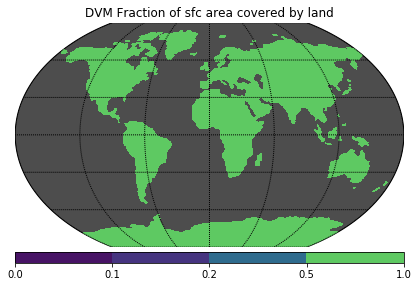

In [7]:
# example from http://matplotlib.org/basemap/users/examples.html

date = datetime(2007,12,15,0) # date to plot.
# open dataset.
#dataset = \
#Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
#timevar = dataset.variables['time']
#timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
#sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
#ice = dataset.variables['ice'][timeindex,:].squeeze()

lons, lats = np.meshgrid(lon2,lat2)
print lons.shape
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(projection='kav7',lon_0=0,resolution=None)
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
# im1 = m.pcolormesh(lons,lats,DVM,shading='flat',cmap=plt.cm.jet,latlon=True)
# cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# draw parallels and meridians, but don't bother labelling them.
# contour data over the map.
tlevs = [0.,0.1,0.2,0.5,1]
cs = m.contourf(lons,lats,DVM,tlevs,latlon=True)
#cs = m.contourf(lons,lats,DVM,10,latlon=True)
plt.title('contour lines over filled continent background')
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(cs,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('DVM %s'% DVM.long_name)
plt.show()
